<a href="https://colab.research.google.com/github/victormserra/Stats_Demonstrations/blob/main/Car_Price_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Regressão Univariada

## Introdução

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform

In [ ]:
cars = pd.read_csv('car_price_dataset.csv')

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [ ]:
cars.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


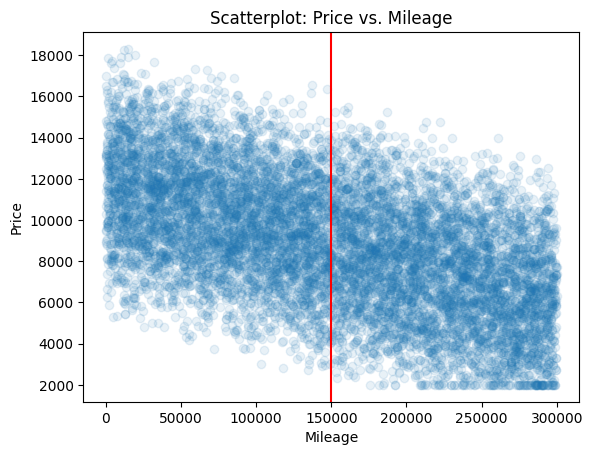

In [ ]:
plt.plot(cars['Mileage'], cars['Price'],
         marker = 'o',
         linestyle = '',
         alpha = 0.1)

plt.axvline(x = 150000, color = 'red')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Scatterplot: Price vs. Mileage')
plt.show()

In [ ]:
# Removendo pontos de influência

print(cars[cars['Price'] == 2000][['Mileage']].count())

cars = cars[cars['Price'] != 2000]

Mileage    93
dtype: int64


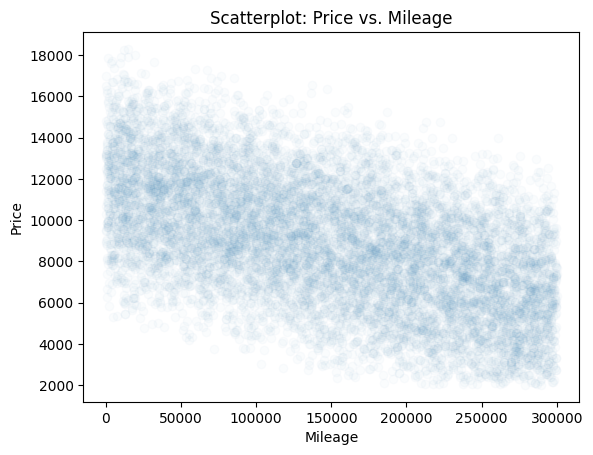

In [ ]:
plt.plot(cars['Mileage'], cars['Price'],
         marker = 'o',
         linestyle = '',
         alpha = 0.02)

plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Scatterplot: Price vs. Mileage')
plt.show()

## Pré-processamento

In [ ]:
X = cars[['Mileage']]
y = cars[['Price']]

# Removemos pontos de influência
# Não há outliers

# Split treinamento/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

# Normalizar
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
y_train = scaler.fit_transform(y_train)
X_test = scaler.fit_transform(X_test)
y_test = scaler.fit_transform(y_test)

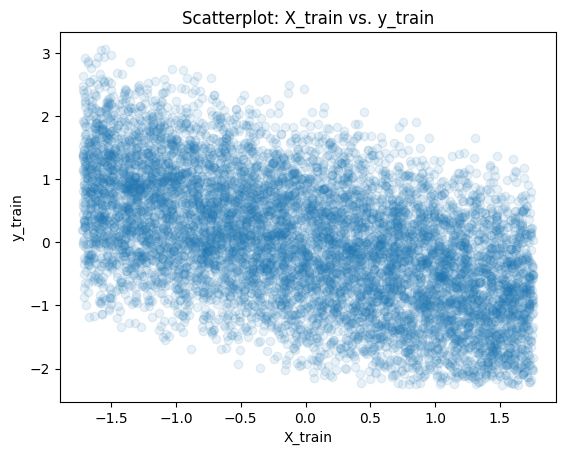

In [ ]:
# Dados limpos e escalonados
plt.plot(X_train, y_train,
         marker = 'o',
         linestyle = '',
         alpha = 0.1)

plt.xlabel('X_train')
plt.ylabel('y_train')
plt.title('Scatterplot: X_train vs. y_train')
plt.show()

## Regressão Linear Simples

In [ ]:
rls = LinearRegression()
rls.fit(X_train, y_train)
rls_pred = rls.predict(X_test)

# Avaliação do Modelo: MSE e R²
mse_rls_teste = round(mean_squared_error(y_test, rls_pred), 4)
r2_rls_teste = round(r2_score(y_test, rls_pred), 4)

# Print
print(f'R² Regressão Linear Simples: {r2_rls_teste}')
print(f'MSE Regressão Linear Simples Teste: {mse_rls_teste}')


R² Regressão Linear Simples Treinamento: 0.2918
R² Regressão Linear Simples Teste: 0.2843
MSE Regressão Linear Simples Treinamento: 0.7067
MSE Regressão Linear Simples Teste: 0.7157


## Regressão Lasso

In [ ]:
lasso = Lasso(random_state = 42)

# Grade de hiperparâmetros
param_grid = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}

# Grid Search
search = GridSearchCV(estimator = lasso, param_grid = param_grid, scoring = 'r2', cv = 9)

# Busca o melhor hiperparâmetro alpha
search.fit(X_train, y_train)

GridSearchCV(cv=9, estimator=Lasso(random_state=42),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10]},
             scoring='r2')

In [ ]:
# Resultados do Grid Search
results_df = pd.DataFrame(search.cv_results_)
results_df = results_df.sort_values(by = ['rank_test_score'])
results_df[['params', 'rank_test_score', 'mean_test_score', 'std_test_score']]

,params,rank_test_score,mean_test_score,std_test_score
539,{'alpha': 9.402764566535106},1,0.292702,0.014819
3364,{'alpha': 9.405477478689857},2,0.292702,0.014819
545,{'alpha': 9.401077291652912},3,0.292702,0.014819
4709,{'alpha': 9.406553901923575},4,0.292702,0.014819
1973,{'alpha': 9.40957956023774},5,0.292702,0.014819
...,...,...,...,...
889,{'alpha': 1.0091953929548516},4996,0.292702,0.014852
1673,{'alpha': 1.0065056360742477},4997,0.292702,0.014852
2983,{'alpha': 1.0058713847791292},4998,0.292702,0.014852
2784,{'alpha': 1.004910947505512},4999,0.292702,0.014852


In [ ]:
# Reinicializamos o modelo com o melhor hiperparâmetro
lasso = Lasso(alpha = 0.001, random_state = 42)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

# Avaliação Final do Modelo: MSE e R²
mse_lasso = round(mean_squared_error(y_test, lasso_pred), 4)
r2_lasso = round(r2_score(y_test, lasso_pred), 4)

# Print
print(f'R² Regressão Lasso: {r2_lasso}')
print(f'MSE Regressão Lasso: {mse_lasso}')

R² Regressão Lasso: 0.284284
MSE Regressão Lasso: 0.715716


## Regressão Ridge

In [ ]:
ridge = Ridge(random_state = 42)

# Grade de hiperparâmetros
param_grid = {
    'alpha': uniform(loc = 1, scale = 10)
}

# Grid Search
search = RandomizedSearchCV(estimator = ridge, param_distributions = param_grid, scoring = 'r2', n_iter = 2500)

# Busca o melhor hiperparâmetro alpha
search.fit(X_train, y_train)

RandomizedSearchCV(estimator=Ridge(random_state=42), n_iter=2500,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ea7daa453d0>},
                   scoring='r2')

In [ ]:
# Resultados do Grid Search
results_df = pd.DataFrame(search.cv_results_)
results_df = results_df.sort_values(by = ['rank_test_score'])
results_df[['params', 'rank_test_score', 'mean_test_score', 'std_test_score']].head(6)

,params,rank_test_score,mean_test_score,std_test_score
1747,{'alpha': 9.401226932139704},1,0.292702,0.014819
2347,{'alpha': 9.400619852936178},2,0.292702,0.014819
100,{'alpha': 9.393698149136181},3,0.292702,0.014819
1521,{'alpha': 9.42096758012141},4,0.292702,0.014819
2221,{'alpha': 9.384682402321804},5,0.292702,0.014819
404,{'alpha': 9.423060263879954},6,0.292702,0.014819


In [ ]:
# Reinicializamos o modelo com o melhor hiperparâmetro
Ridge(alpha=9.402764566535106, random_state=42)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

# Avaliação Final do Modelo: MSE e R²
mse_ridge = round(mean_squared_error(y_test, ridge_pred), 4)
r2_ridge = round(r2_score(y_test, ridge_pred), 4)

# Print
print(f'R² Regressão Ridge: {r2_ridge}')
print(f'MSE Regressão Ridge: {mse_ridge}')

R² Regressão Ridge: 0.284269
MSE Regressão Ridge: 0.715731


## Regressão Elastic Net

In [ ]:
elastic = ElasticNet(random_state = 42)

# Grade de hiperparâmetros
param_grid = {
    'alpha': uniform(loc = 0, scale = 1),
    'l1_ratio': uniform(loc = 0, scale = 1)
}

# Grid Search
search = RandomizedSearchCV(estimator = elastic, param_distributions = param_grid, scoring = 'r2', n_iter = 3000)

# Busca o melhor hiperparâmetro alpha
search.fit(X_train, y_train)

RandomizedSearchCV(estimator=ElasticNet(random_state=42), n_iter=3000,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ea7df80a0d0>,
                                        'l1_ratio': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ea7df80bb90>},
                   scoring='r2')

In [ ]:
# Resultados do Grid Search
results_df = pd.DataFrame(search.cv_results_)
results_df = results_df.sort_values(by = ['rank_test_score'])
results_df[['params', 'rank_test_score', 'mean_test_score', 'std_test_score']].head(6)

,params,rank_test_score,mean_test_score,std_test_score
1502,"{'alpha': 0.0004841193982310088, 'l1_ratio': 0...",1,0.292702,0.014839
1971,"{'alpha': 0.0004318204513699131, 'l1_ratio': 0...",2,0.292702,0.014841
2761,"{'alpha': 0.0020075963932438823, 'l1_ratio': 0...",3,0.292702,0.014786
2181,"{'alpha': 0.0015311650710712055, 'l1_ratio': 0...",4,0.292701,0.014784
2653,"{'alpha': 0.0019594704196223, 'l1_ratio': 0.76...",5,0.292701,0.014767
2524,"{'alpha': 0.003325899694396006, 'l1_ratio': 0....",6,0.292700,0.014753


In [ ]:
elastic = ElasticNet(alpha=0.0014425390376523461, l1_ratio=0.07301716555410531, random_state=42)
elastic.fit(X_train, y_train)
elastic_pred = elastic.predict(X_test)

# Avaliação Final do Modelo: MSE e R²
mse_elastic = round(mean_squared_error(y_test, elastic_pred), 4)
r2_elastic = round(r2_score(y_test, elastic_pred), 4)

# Print
print(f'R² Regressão Elastic Net: {r2_elastic}')
print(f'MSE Regressão Elastic Net: {mse_elastic}')

R² Regressão Elastic Net: 0.2843
MSE Regressão Elastic Net: 0.7157


In [ ]:
# Estranhamente o Elastic Net não volta pra performance da RLS
ElasticNet(alpha = 0, l1_ratio = 0.5, random_state=42)
elastic.fit(X_train, y_train)
elastic_pred = elastic.predict(X_test)

# Avaliação Final do Modelo: MSE e R²
mse_elastic = round(mean_squared_error(y_test, elastic_pred), 4)
r2_elastic = round(r2_score(y_test, elastic_pred), 4)

# Print
print(f'R² Regressão Elastic Net: {r2_elastic}')
print(f'MSE Regressão Elastic Net: {mse_elastic}')

R² Regressão Elastic Net: 0.284282
MSE Regressão Elastic Net: 0.715718


## Regressão SVM (SVR)

In [ ]:
svr = SVR()

# Grade de hiperparâmetros
param_grid = [
    {'kernel': ['linear'], 'C': [0.01, 0.1, 1]},
    {'kernel': ['rbf', 'poly', 'sigmoid'], 'C': [0.01, 0.1, 1], 'gamma': [0.01, 0.1, 1]}
             ]

search = GridSearchCV(estimator = svr, param_grid = param_grid, scoring = 'r2')

# Busca o melhor hiperparâmetro alpha
search.fit(X_train, y_train.ravel())

GridSearchCV(estimator=SVR(),
             param_grid=[{'C': [0.01, 0.1, 1], 'kernel': ['linear']},
                         {'C': [0.01, 0.1, 1], 'gamma': [0.01, 0.1, 1],
                          'kernel': ['rbf', 'poly', 'sigmoid']}],
             scoring='r2')

In [ ]:
# Resultados do Grid Search
results_df = pd.DataFrame(search.cv_results_)
results_df = results_df.sort_values(by = ['rank_test_score'])
results_df[['params', 'rank_test_score', 'mean_test_score', 'std_test_score']].head(6)

,params,rank_test_score,mean_test_score,std_test_score
17,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'sigmoid'}",1,0.292709,0.015114
0,"{'C': 0.01, 'kernel': 'linear'}",2,0.292582,0.014993
23,"{'C': 1, 'gamma': 0.01, 'kernel': 'sigmoid'}",3,0.292572,0.014997
2,"{'C': 1, 'kernel': 'linear'}",4,0.292555,0.015145
1,"{'C': 0.1, 'kernel': 'linear'}",5,0.292554,0.015134
21,"{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}",6,0.292547,0.015401


In [ ]:
svr = SVR(C=0.1, gamma=0.1, kernel='sigmoid')
svr.fit(X_train, y_train.ravel())
svr_pred = svr.predict(X_test)

# Avaliação Final do Modelo: R² e MSE
r2_svr = round(r2_score(y_test, svr_pred), 4)
mse_svr = round(mean_squared_error(y_test, svr_pred), 4)

# Print
print(f'R² Regressão SVM: {r2_svr}')
print(f'MSE Regressão SVM: {mse_svr}')

R² Regressão SVM: 0.284069
MSE Regressão SVM: 0.715931


## Comparação Final

In [ ]:
data = {
    'Modelo': ['RLS', 'Lasso', 'Ridge', 'Elastic Net', 'SVR'],
    'R²': [r2_rls, r2_lasso, r2_ridge, r2_elastic, r2_svr],
    'MSE': [mse_rls, mse_lasso, mse_ridge, mse_elastic, mse_svr]
}

scores = pd.DataFrame(data = data).sort_values(by = 'R²', ascending = False)

print(scores)

        Modelo        R²       MSE
0          RLS  0.291800  0.706700
3  Elastic Net  0.284300  0.715700
1        Lasso  0.284284  0.715716
2        Ridge  0.284269  0.715731
4          SVR  0.284069  0.715931


## Visualizando os Modelos

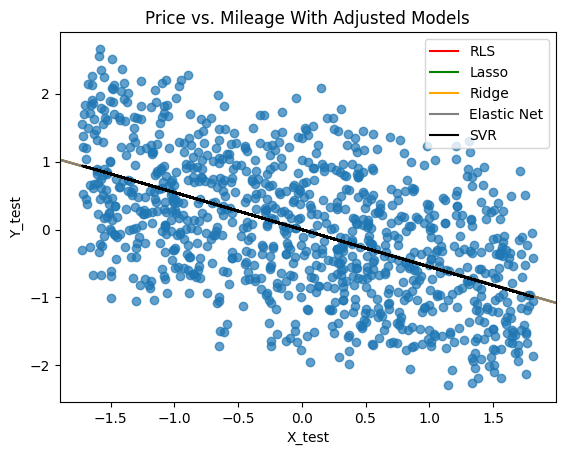

In [ ]:
# Plot
plt.plot(X_test, y_test,
         marker = 'o',
         linestyle = '',
         alpha = 0.7)

# Labels
plt.xlabel('X_test')
plt.ylabel('Y_test')
plt.title('Price vs. Mileage With Adjusted Models')

# Modelos
plt.axline(xy1 = (0, rls.intercept_.flatten()[0]), slope = rls.coef_.flatten()[0], color = 'red', label = 'RLS')
plt.axline(xy1 = (0, lasso.intercept_.flatten()[0]), slope = lasso.coef_.flatten()[0], color = 'green', label = 'Lasso')
plt.axline(xy1 = (0, ridge.intercept_.flatten()[0]), slope = ridge.coef_.flatten()[0], color = 'orange', label = 'Ridge')
plt.axline(xy1 = (0, elastic.intercept_.flatten()[0]), slope = elastic.coef_.flatten()[0], color = 'gray', label = 'Elastic Net')
plt.plot(X_test, svr_pred, color = "black", label = 'SVR')

# Mostrar
plt.legend()
plt.show()

In [1]:
%%shell
jupyter nbconvert --to html /content/Car_Price_Regression.ipynb


[NbConvertApp] Converting notebook /content/Car_Price_Regression.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 1540689 bytes to /content/Car_Price_Regression.html
